# Imports

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import csv
import matplotlib.pyplot as plt

# autoreload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Imports from sklearn

In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

## Import: This stops the annoying future warning messages

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Import Dataset

In [5]:
neo = pd.read_csv('../data/neo.csv')
neo.shape

(90836, 10)

# Basic EDA

## Basic info on dataset: shape, info, head, tail, describe, nunique

### shape

In [6]:
neo.shape

(90836, 10)

### info()

In [7]:
neo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


### head and tail

In [8]:
neo.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [9]:
neo.tail()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False
90835,54205447,(2021 TW7),0.039862,0.089133,27024.455553,5.977213e+07,Earth,False,24.12,False


### describe

In [10]:
neo.describe

<bound method NDFrame.describe of              id                 name  est_diameter_min  est_diameter_max  \
0       2162635  162635 (2000 SS164)          1.198271          2.679415   
1       2277475    277475 (2005 WK4)          0.265800          0.594347   
2       2512244   512244 (2015 YE18)          0.722030          1.614507   
3       3596030          (2012 BV13)          0.096506          0.215794   
4       3667127          (2014 GE35)          0.255009          0.570217   
...         ...                  ...               ...               ...   
90831   3763337           (2016 VX1)          0.026580          0.059435   
90832   3837603           (2019 AD3)          0.016771          0.037501   
90833  54017201           (2020 JP3)          0.031956          0.071456   
90834  54115824           (2021 CN5)          0.007321          0.016370   
90835  54205447           (2021 TW7)          0.039862          0.089133   

       relative_velocity  miss_distance orbiting_body

In [12]:
neo.describe().T

,count,mean,std,min,25%,50%,75%,max
id,90836.0,1.438288e+07,2.087202e+07,2.000433e+06,3.448110e+06,3.748362e+06,3.884023e+06,5.427591e+07
est_diameter_min,90836.0,1.274321e-01,2.985112e-01,6.089126e-04,1.925551e-02,4.836765e-02,1.434019e-01,3.789265e+01
est_diameter_max,90836.0,2.849469e-01,6.674914e-01,1.361570e-03,4.305662e-02,1.081534e-01,3.206564e-01,8.473054e+01
relative_velocity,90836.0,4.806692e+04,2.529330e+04,2.033464e+02,2.861902e+04,4.419012e+04,6.292360e+04,2.369901e+05
miss_distance,90836.0,3.706655e+07,2.235204e+07,6.745533e+03,1.721082e+07,3.784658e+07,5.654900e+07,7.479865e+07
absolute_magnitude,90836.0,2.352710e+01,2.894086e+00,9.230000e+00,2.134000e+01,2.370000e+01,2.570000e+01,3.320000e+01


In [11]:
neo.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,90836.0,NaN,NaN,NaN,14382878.05216,20872018.353893,2000433.0,3448110.0,3748362.0,3884023.0,54275914.0
name,90836,27423,469219 Kamo`oalewa (2016 HO3),43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
est_diameter_min,90836.0,NaN,NaN,NaN,0.127432,0.298511,0.000609,0.019256,0.048368,0.143402,37.89265
est_diameter_max,90836.0,NaN,NaN,NaN,0.284947,0.667491,0.001362,0.043057,0.108153,0.320656,84.730541
relative_velocity,90836.0,NaN,NaN,NaN,48066.918918,25293.296961,203.346433,28619.020645,44190.11789,62923.604633,236990.128088
miss_distance,90836.0,NaN,NaN,NaN,37066546.030422,22352040.59919,6745.532516,17210820.235765,37846579.263426,56548996.451399,74798651.452197
orbiting_body,90836,1,Earth,90836,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sentry_object,90836,1,False,90836,NaN,NaN,NaN,NaN,NaN,NaN,NaN
absolute_magnitude,90836.0,NaN,NaN,NaN,23.527103,2.894086,9.23,21.34,23.7,25.7,33.2
hazardous,90836,2,False,81996,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### nunique

In [13]:
neo.nunique()

id                    27423
name                  27423
est_diameter_min       1638
est_diameter_max       1638
relative_velocity     90828
miss_distance         90536
orbiting_body             1
sentry_object             1
absolute_magnitude     1638
hazardous                 2
dtype: int64

### isnull

In [14]:
neo.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [15]:
(neo.isnull().sum()/(len(neo)))*100

id                    0.0
name                  0.0
est_diameter_min      0.0
est_diameter_max      0.0
relative_velocity     0.0
miss_distance         0.0
orbiting_body         0.0
sentry_object         0.0
absolute_magnitude    0.0
hazardous             0.0
dtype: float64

### value_counts()

In [16]:
neo.value_counts()

id        name                est_diameter_min  est_diameter_max  relative_velocity  miss_distance  orbiting_body  sentry_object  absolute_magnitude  hazardous
2000433   433 Eros (A898 PA)  23.043847         51.527608         15884.252623       5.468808e+07   Earth          False          10.310              False        1
3831182   (2018 TR)           0.021113          0.047211          67580.251365       6.304910e+07   Earth          False          25.500              False        1
3831167   (2018 TC)           0.012722          0.028447          21096.497062       3.055892e+05   Earth          False          26.600              False        1
                                                                  16528.547787       1.170378e+07   Earth          False          26.600              False        1
                                                                  15163.637016       4.257412e+07   Earth          False          26.600              False        1
               

### Separates Numerical and Categorical variables

In [17]:
cat_cols=neo.select_dtypes(include=['object']).columns
num_cols = neo.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['name', 'orbiting_body'], dtype='object')
Numerical Variables:
['id', 'est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']


# Quick Graphs

## Correlation Heatmap

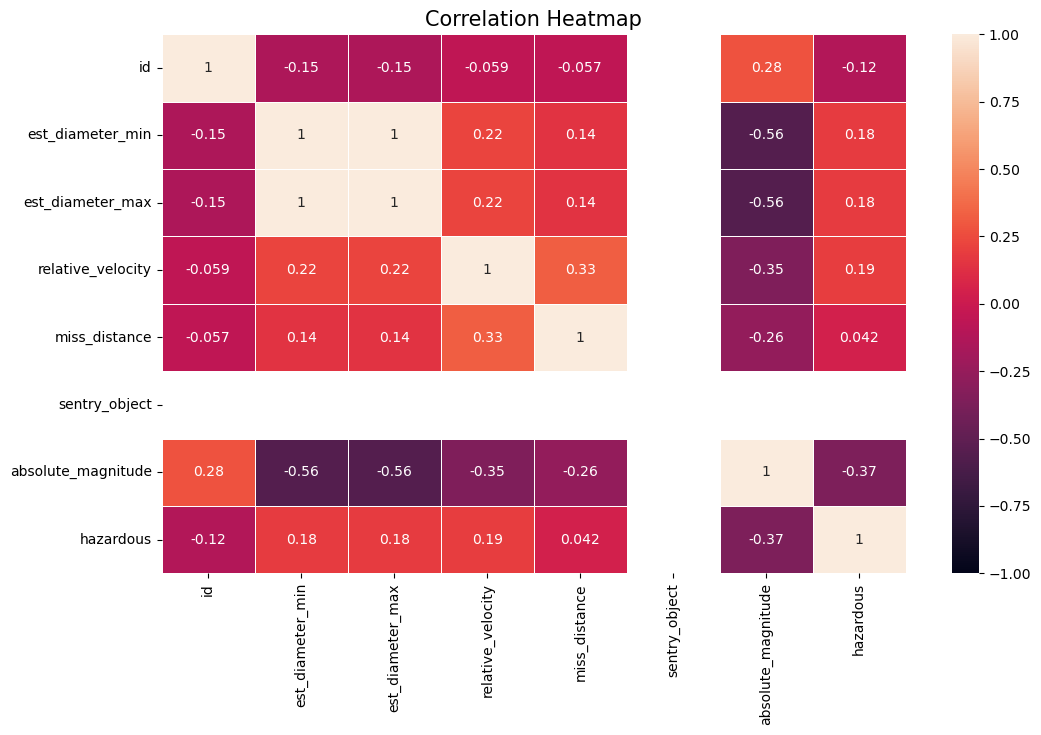

In [18]:
plt.figure(figsize = (12, 7))
sns.heatmap((neo).corr(), annot = True, linewidths=.5, vmin = -1, vmax = 1)
plt.title('Correlation Heatmap', fontsize = 15)
plt.show()

## SNS pairplot

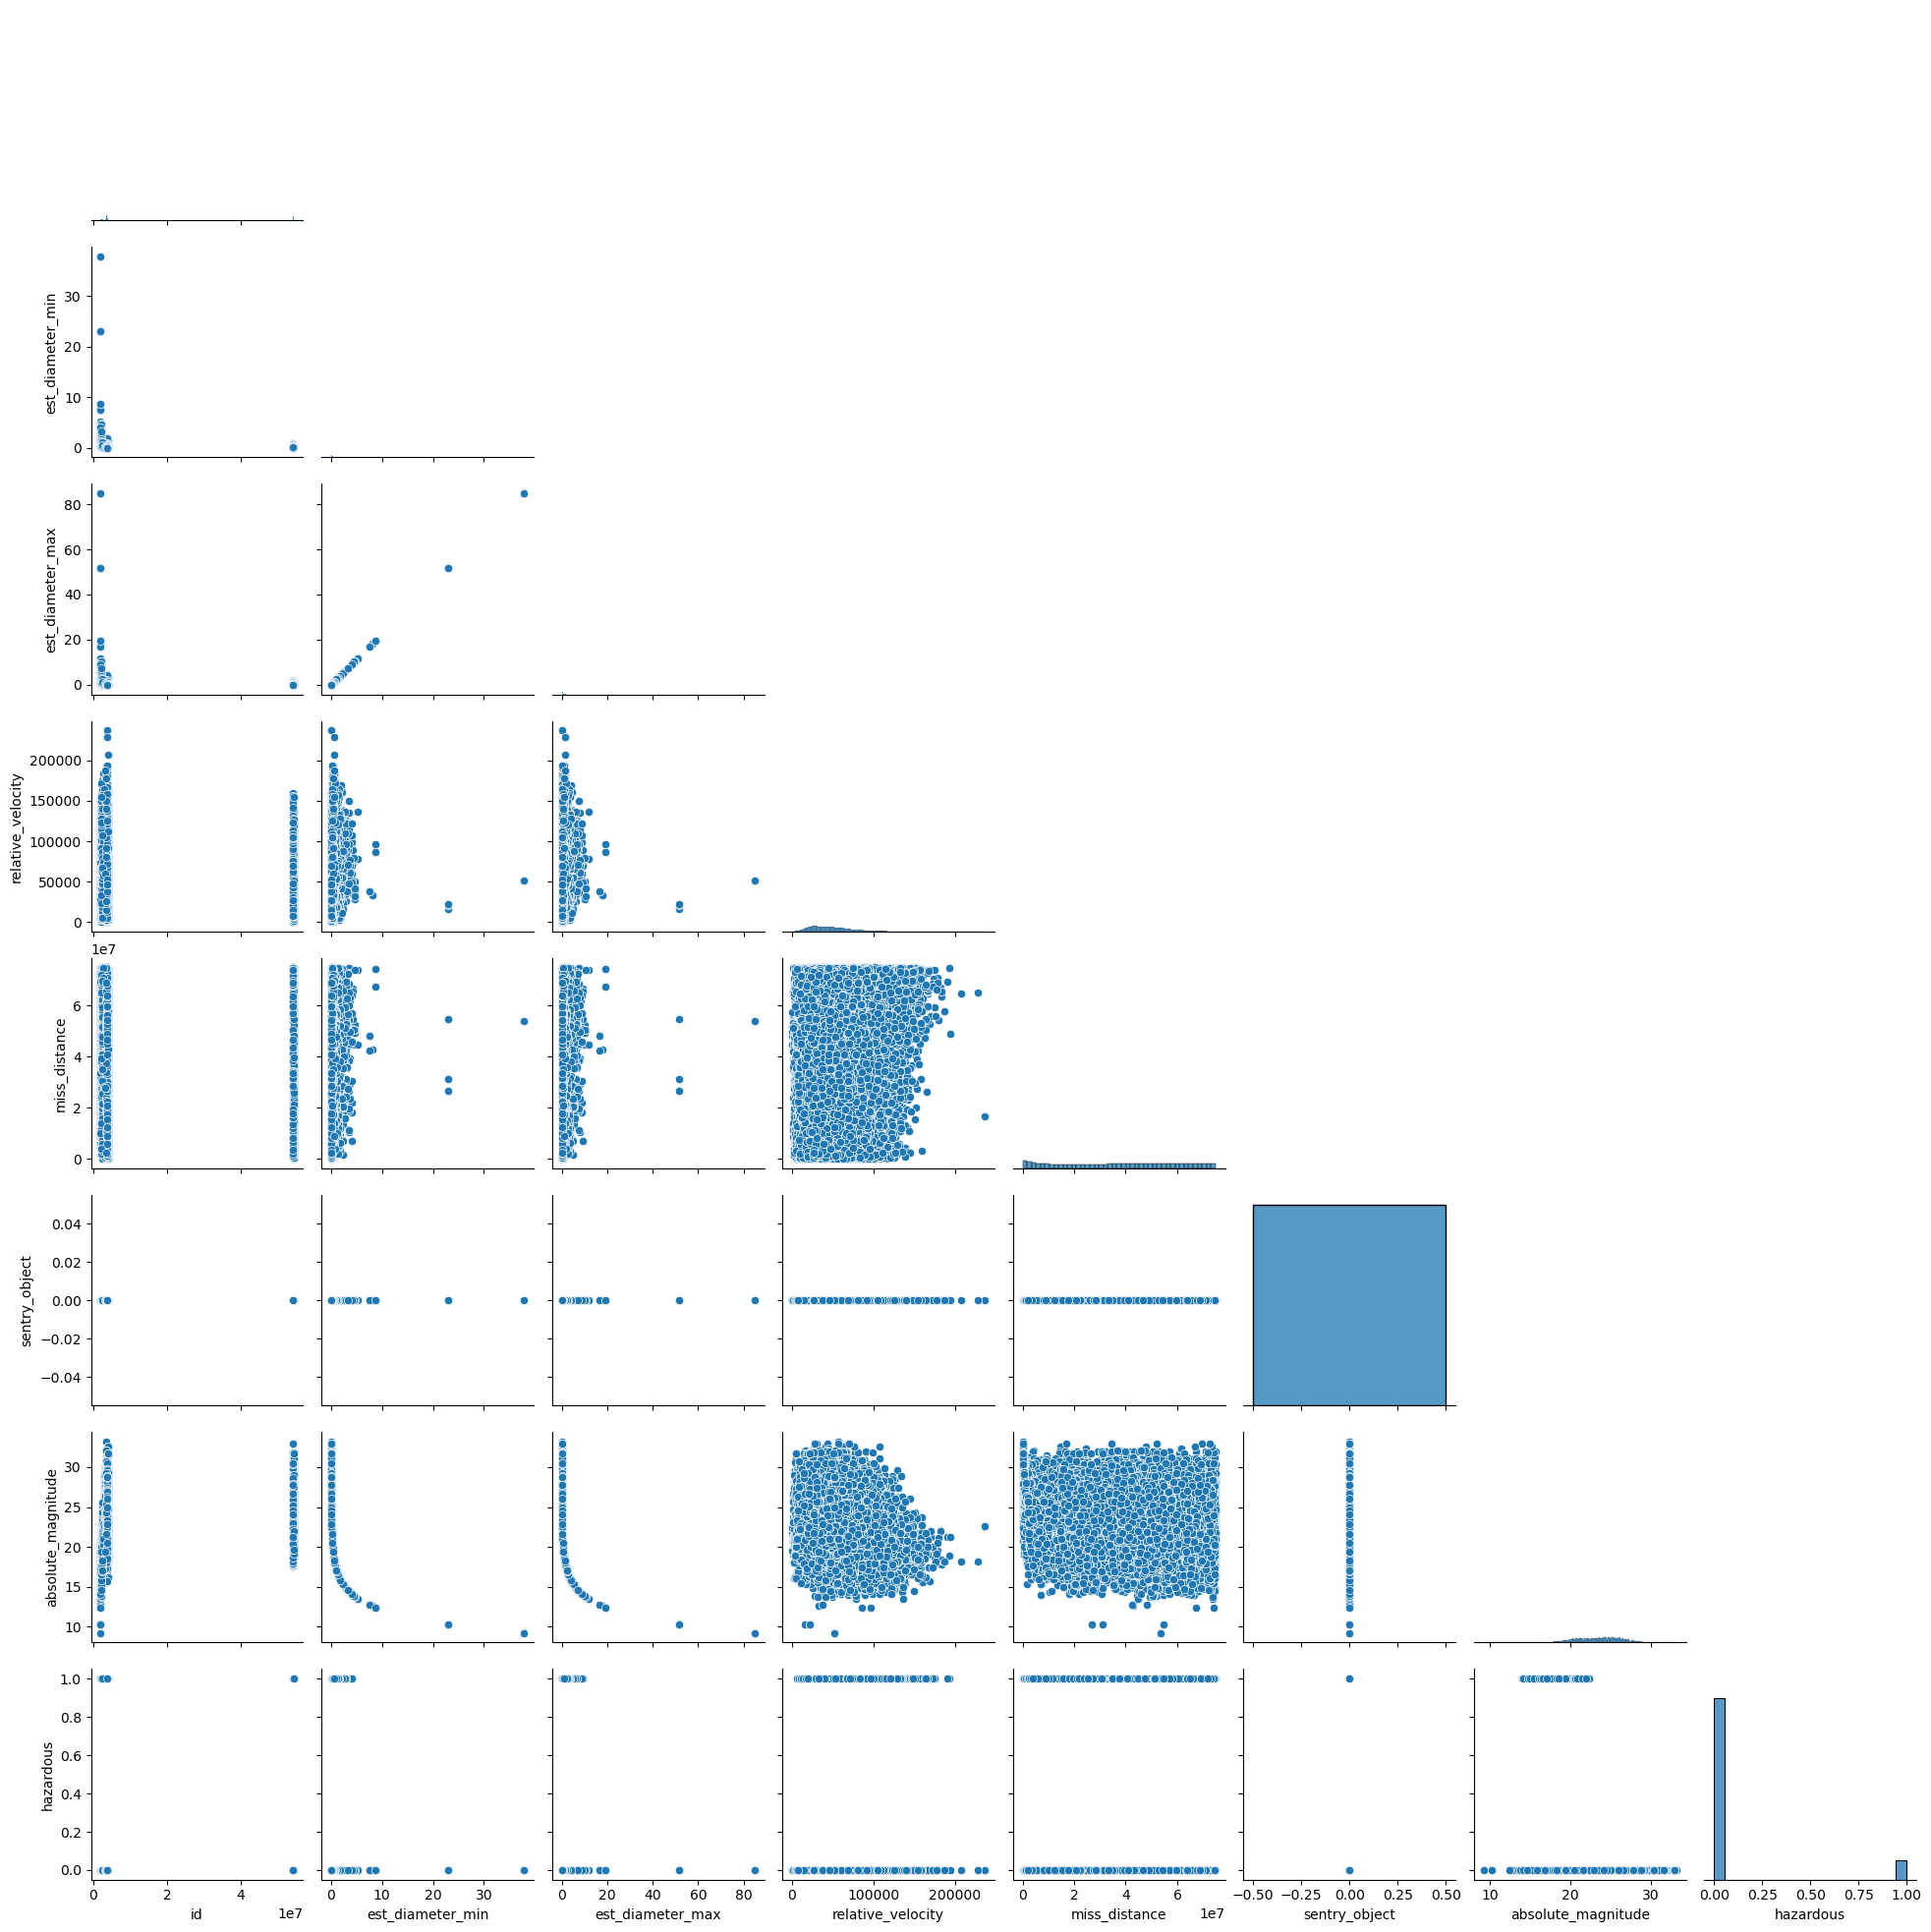

In [19]:
sns.pairplot(data=neo, corner=True)

## Histogram

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'est_diameter_min'}>],
       [<Axes: title={'center': 'est_diameter_max'}>,
        <Axes: title={'center': 'relative_velocity'}>],
       [<Axes: title={'center': 'miss_distance'}>,
        <Axes: title={'center': 'absolute_magnitude'}>]], dtype=object)

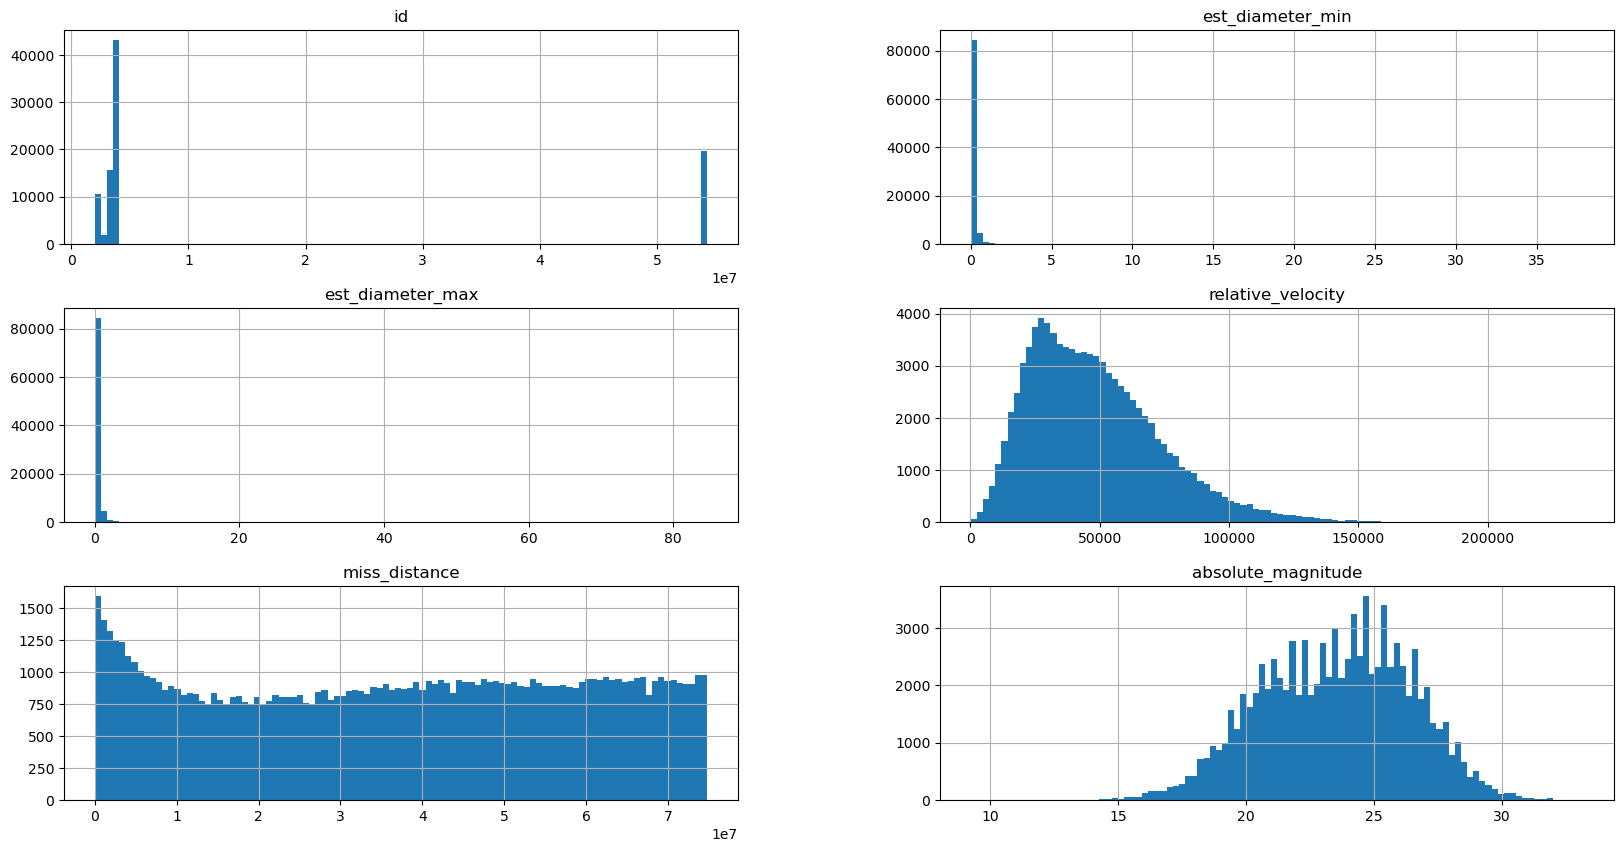

In [20]:
neo.hist(bins=100, figsize = [20, 10])

## Hist of Absolute Magnitude

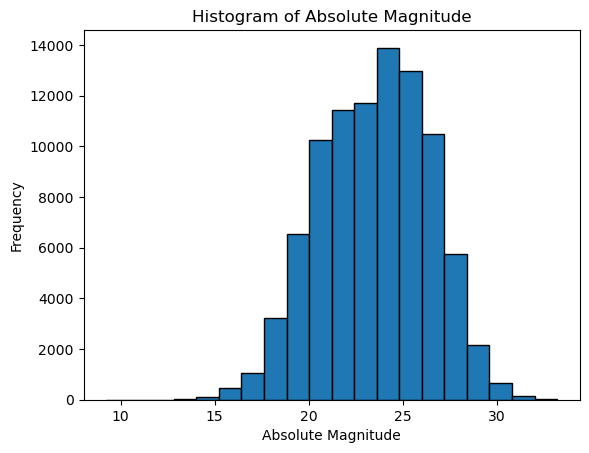

In [21]:
plt.hist(neo['absolute_magnitude'], bins=20, edgecolor='black') 
plt.xlabel('Absolute Magnitude')
plt.ylabel('Frequency')
plt.title('Histogram of Absolute Magnitude')
plt.show()

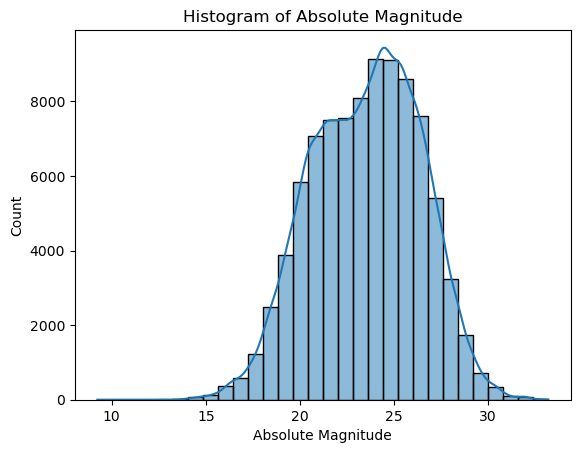

In [31]:
plt.figure()
sns.histplot(neo['absolute_magnitude'], bins=30, kde=True)
plt.xlabel('Absolute Magnitude')
plt.title('Histogram of Absolute Magnitude')
plt.show()

# Drop Columns: Id-not relevant, Name-not relevant, Orbiting Body-only Earth, sentry object-only one

In [32]:
# Drop the specified columns from the DataFrame 'neo'
columns_to_drop = ['id', 'name', 'orbiting_body', 'sentry_object']
neo.drop(columns_to_drop, axis=1, inplace=True)

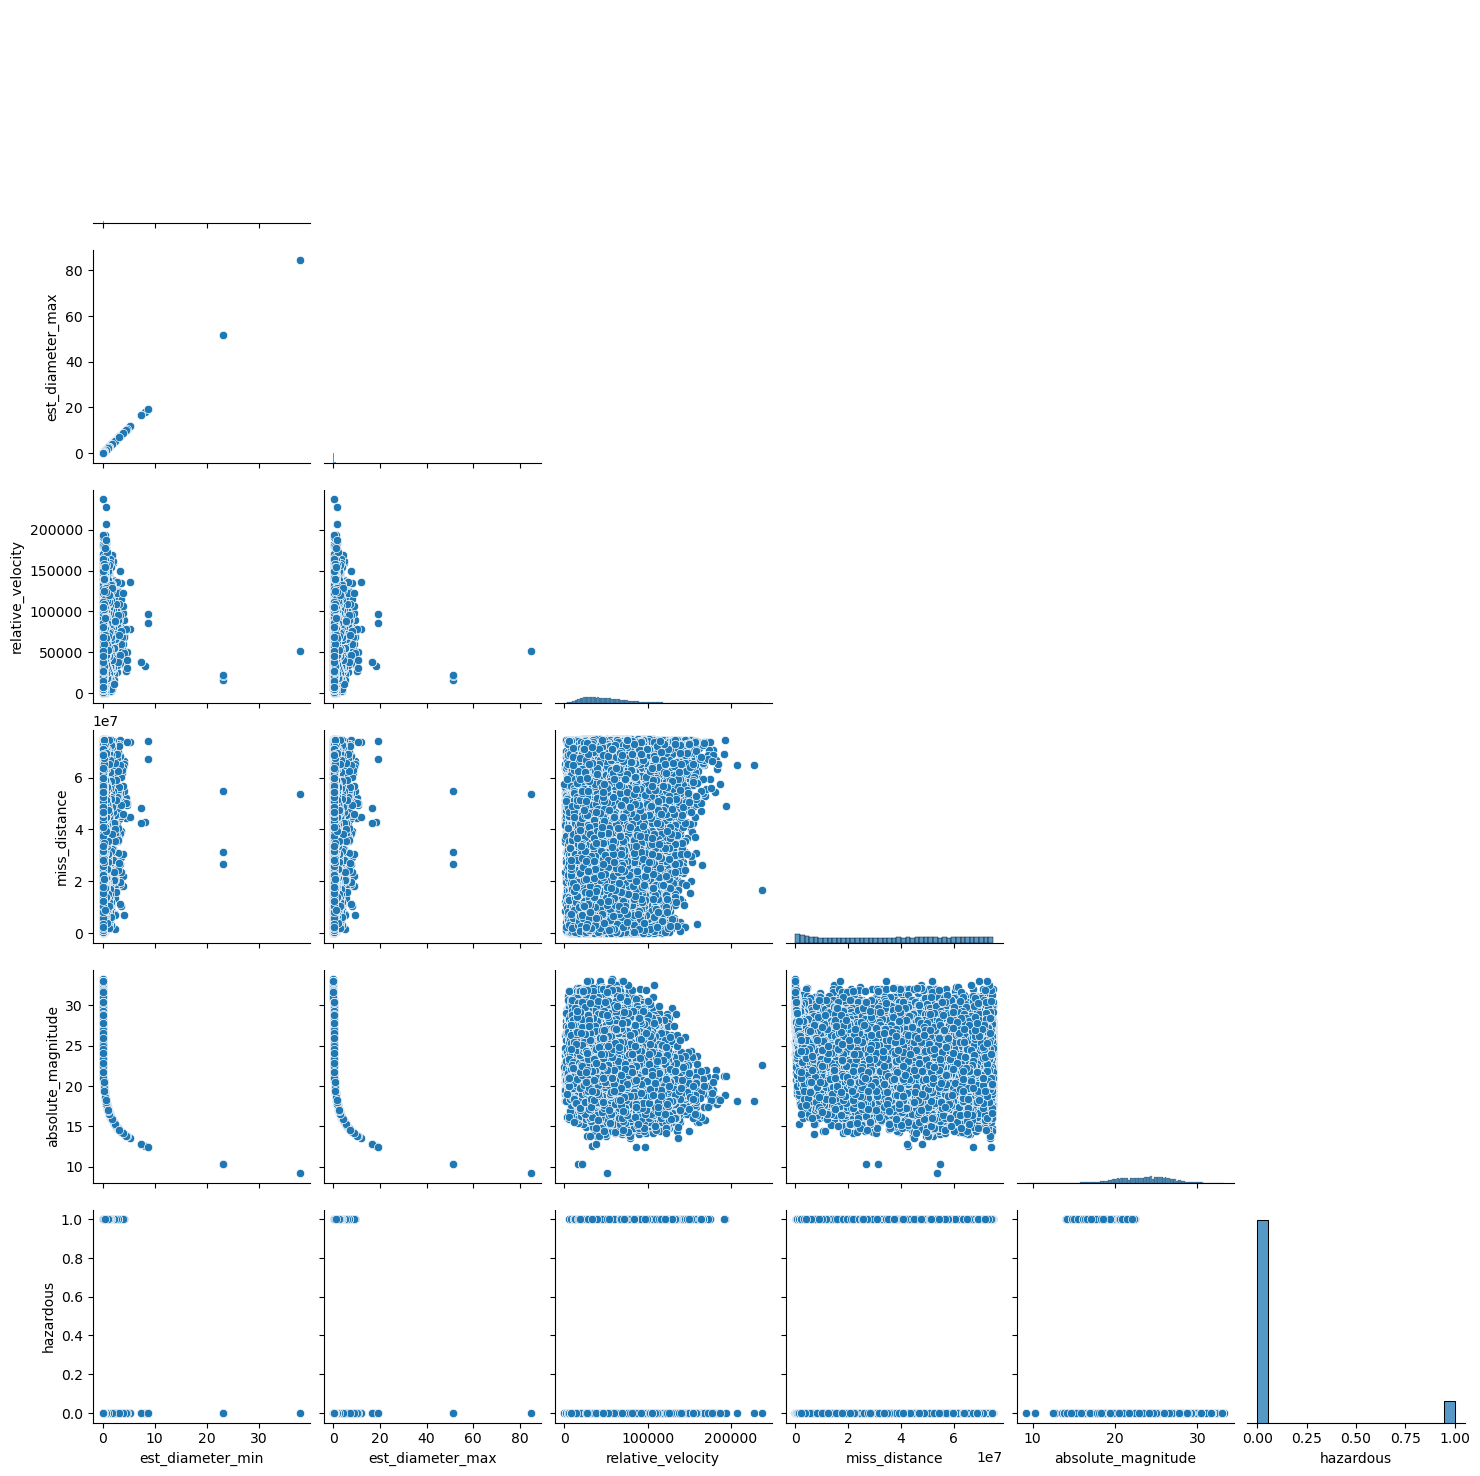

In [34]:
sns.pairplot(data=neo, corner=True)

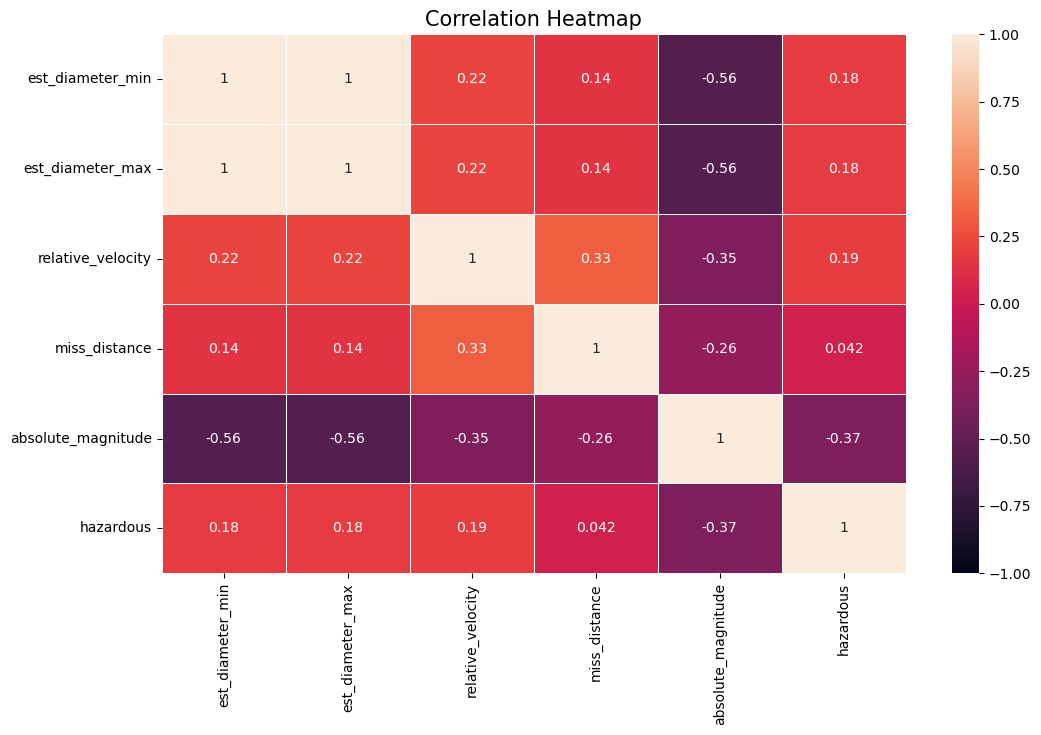

In [41]:
plt.figure(figsize = (12, 7))
sns.heatmap((neo).corr(), annot = True, linewidths=.5, vmin = -1, vmax = 1)
plt.title('Correlation Heatmap', fontsize = 15)
plt.show()

array([[<Axes: title={'center': 'est_diameter_min'}>,
        <Axes: title={'center': 'est_diameter_max'}>],
       [<Axes: title={'center': 'relative_velocity'}>,
        <Axes: title={'center': 'miss_distance'}>],
       [<Axes: title={'center': 'absolute_magnitude'}>, <Axes: >]],
      dtype=object)

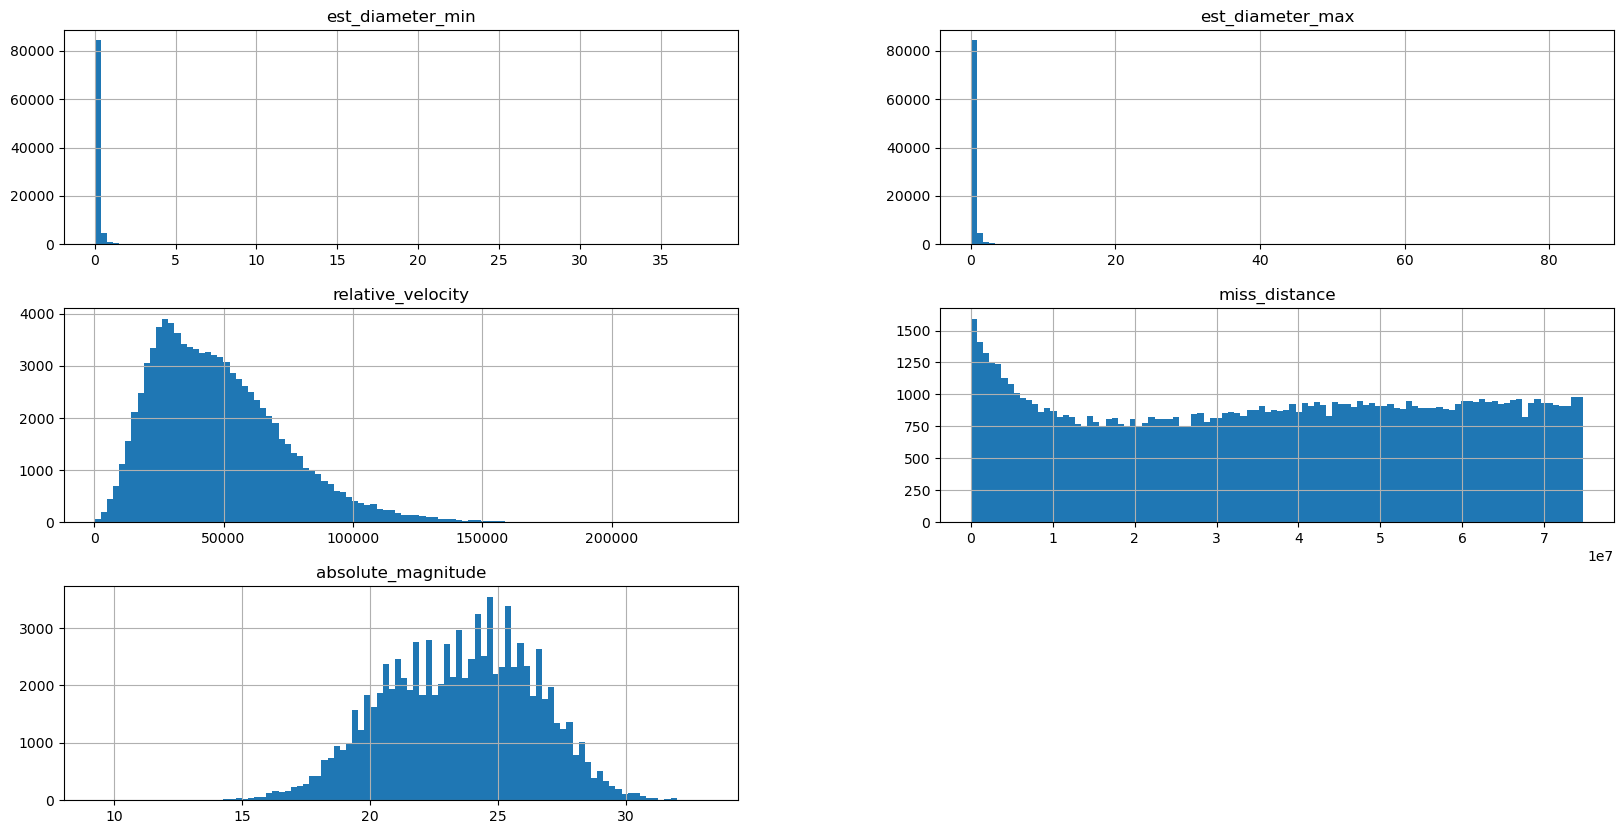

In [42]:
neo.hist(bins=100, figsize = [20, 10])

## Histogram of Numerical Features 

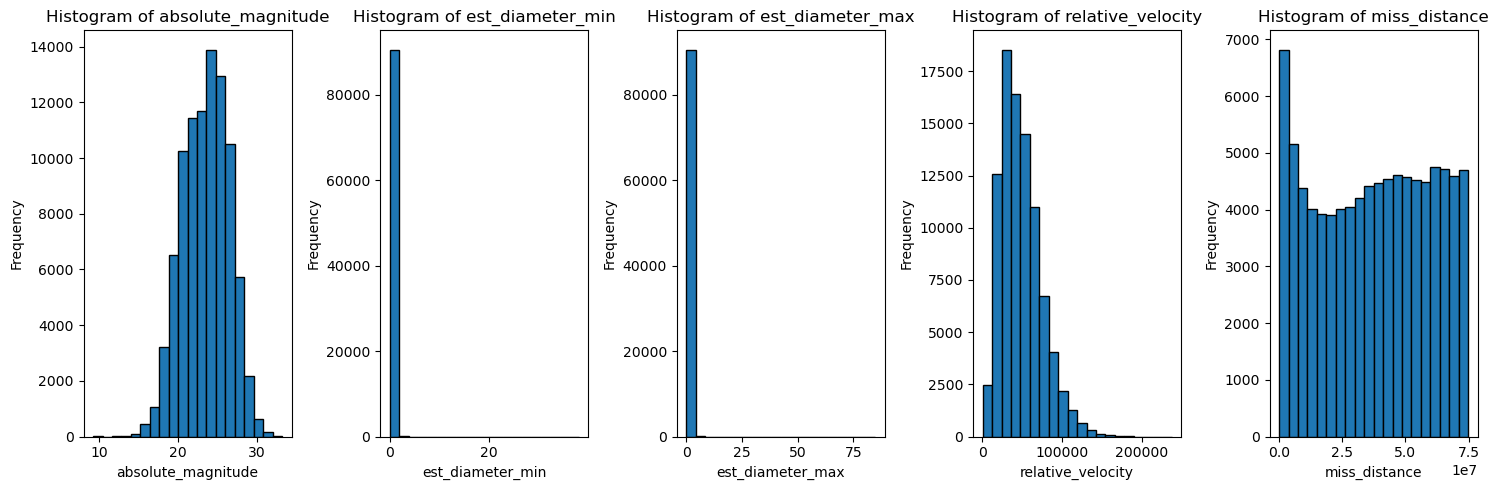

In [43]:
numerical_features = ['absolute_magnitude', 'est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance']

# Create side-by-side histograms using subplots
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_features), figsize=(15, 5))

for i, feature in enumerate(numerical_features):
    axes[i].hist(neo[feature], bins=20, edgecolor='black')
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Hypothesis Testing

### Assuming a p-value of 0.05

## Shapiro-Wilk Test to Determine Normal Distribution

### Looking at Diameter of Hazardous and Non_Hazardous NEOs

In [38]:
# Select estimated diameter for hazardous and non-hazardous NEOs
estimated_diameter_hazardous = neo.loc[neo['hazardous'], 'est_diameter_min']
estimated_diameter_non_hazardous = neo.loc[~neo['hazardous'], 'est_diameter_min']

# Perform Shapiro-Wilk test for normality
_, p_value_hazardous = stats.shapiro(estimated_diameter_hazardous)
_, p_value_non_hazardous = stats.shapiro(estimated_diameter_non_hazardous)

print("Shapiro-Wilk Test (Hazardous): p-value =", p_value_hazardous)
print("Shapiro-Wilk Test (Non-Hazardous): p-value =", p_value_non_hazardous)
'''
 My limited understanding is this low p-value indicates they
 are not normal curves and I need to use another test
 '''


Shapiro-Wilk Test (Hazardous): p-value = 0.0
Shapiro-Wilk Test (Non-Hazardous): p-value = 0.0


'\n My limited understanding is this low p-value indicates they\n are not normal curves and I need to use another test\n '

### Mann - Whitney U Test

In [39]:
# Select estimated diameter for hazardous and non-hazardous NEOs
estimated_diameter_hazardous = neo.loc[neo['hazardous'], 'est_diameter_min']
estimated_diameter_non_hazardous = neo.loc[~neo['hazardous'], 'est_diameter_min']

# Perform Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(estimated_diameter_hazardous, estimated_diameter_non_hazardous, alternative='two-sided')

print("Mann-Whitney U Test - Two-Sided: p-value =", p_value)
'''  
This low p-value indicates a significant difference in the mean estimated diameter between 
hazardous and non-hazardous NEOs ( I think ). Either that or I just layed an egg 
'''

Mann-Whitney U Test - Two-Sided: p-value = 0.0


'  \nThis low p-value indicates a significant difference in the mean estimated diameter between \nhazardous and non-hazardous NEOs ( I think ). Either that or I just layed an egg \n'

# Hypothesis Test 2

## Fishers Test

In [40]:
# Create a 2x2 contingency table
contingency_table_2x2 = pd.crosstab(neo['absolute_magnitude'] <= neo['absolute_magnitude'].median(),
                                   neo['hazardous'])

# Perform Fisher's exact test
odds_ratio, p_value = stats.fisher_exact(contingency_table_2x2)

# Print the results
print("Odds Ratio:", odds_ratio)
print("p-value:", p_value)

Odds Ratio: inf
p-value: 0.0
